In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("408CA(Responses) - Form responses 1.csv")

In [3]:
df = df.drop(columns=[
    'Timestamp', 'Name', 'UID', ' Any additional comments or suggestions regarding biometric attendance systems?'
], errors='ignore')

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df.columns = [col.strip() for col in df.columns]

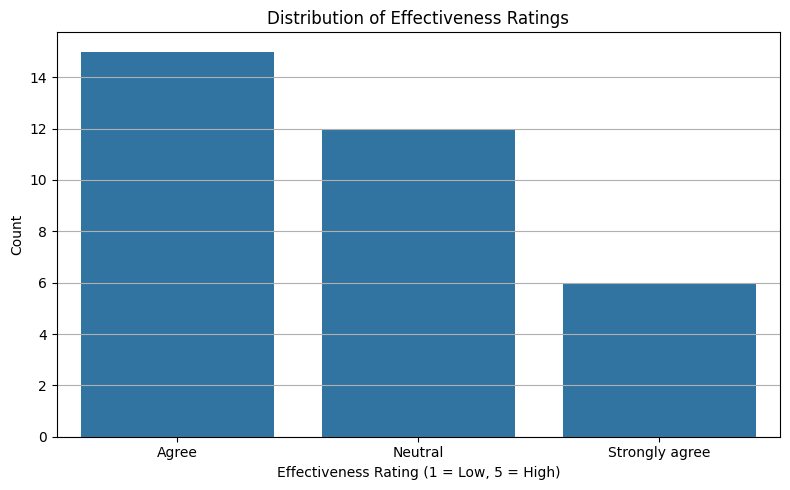

In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df.iloc[:, 9])  
plt.title("Distribution of Effectiveness Ratings")
plt.xlabel("Effectiveness Rating (1 = Low, 5 = High)")
plt.ylabel("Count")
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("effectiveness_distribution.png")
plt.show()

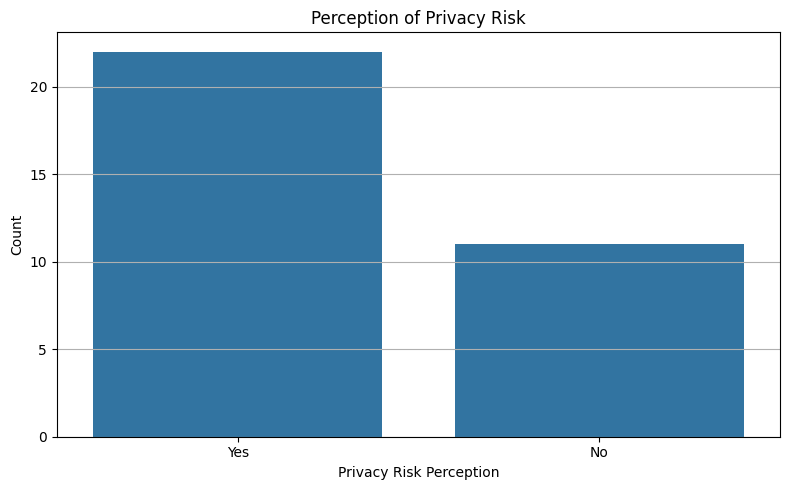

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Do you think biometric data collection poses a risk to personal privacy?', data=df)
plt.title("Perception of Privacy Risk")
plt.xlabel("Privacy Risk Perception")
plt.ylabel("Count")
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("privacy_risk_perception.png")
plt.show()

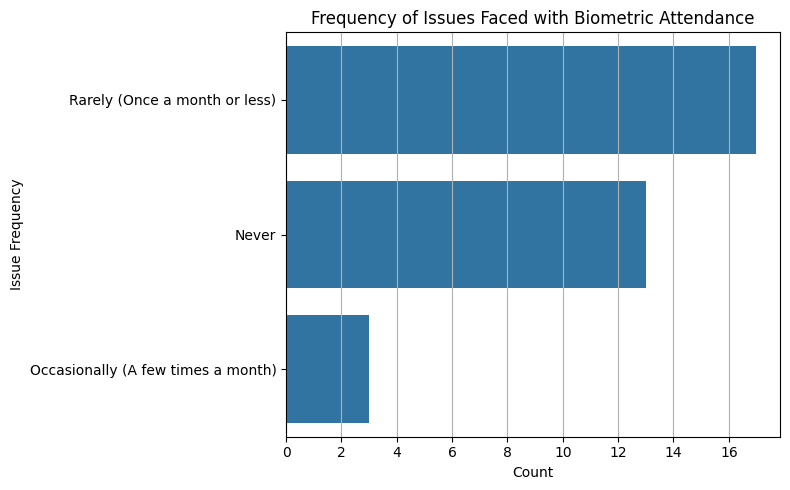

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(y='How often do you face issues while using biometric attendance?', data=df,
              order=df['How often do you face issues while using biometric attendance?'].value_counts().index)
plt.title("Frequency of Issues Faced with Biometric Attendance")
plt.xlabel("Count")
plt.ylabel("Issue Frequency")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

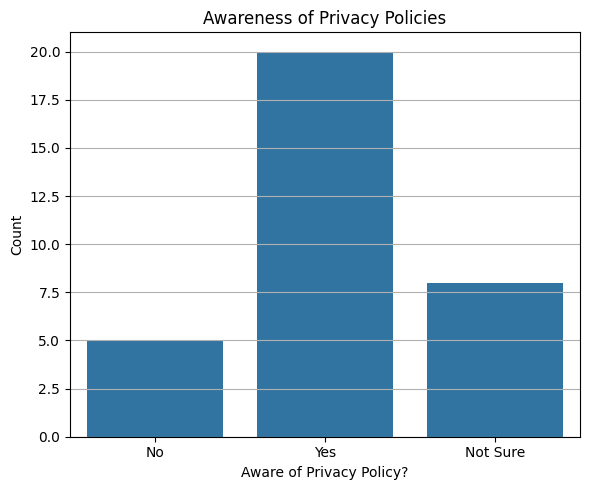

In [9]:
plt.figure(figsize=(6, 5))
sns.countplot(x='Are you aware of any privacy policies related to biometric data collection at your institution?', data=df)
plt.title("Awareness of Privacy Policies")
plt.xlabel("Aware of Privacy Policy?")
plt.ylabel("Count")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

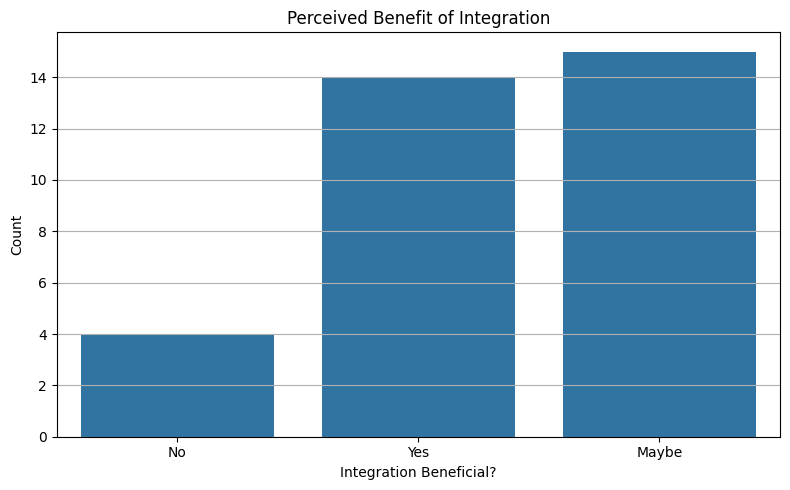

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Do you think integrating biometric attendance with other faculty-related systems (e.g., payroll or leave management) would be beneficial?', data=df)
plt.title("Perceived Benefit of Integration")
plt.xlabel("Integration Beneficial?")
plt.ylabel("Count")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

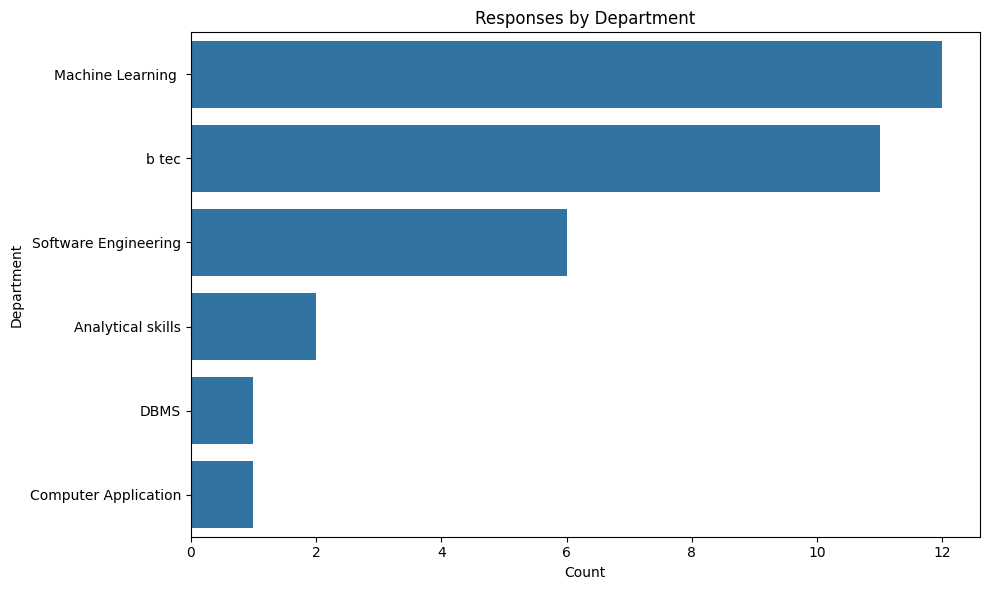

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Department  Name', data=df, order=df['Department  Name'].value_counts().index)
plt.title("Responses by Department")
plt.xlabel("Count")
plt.ylabel("Department")
plt.tight_layout()
plt.show()

Shape: (33, 16)

Missing values:
 Timestamp                                                                                                                                     0
Name                                                                                                                                          0
UID                                                                                                                                           0
Department  Name                                                                                                                              0
Block No.                                                                                                                                     0
Have you used a biometric attendance system before?                                                                                           0
What type of biometric authentication methods are you familiar with?                                  

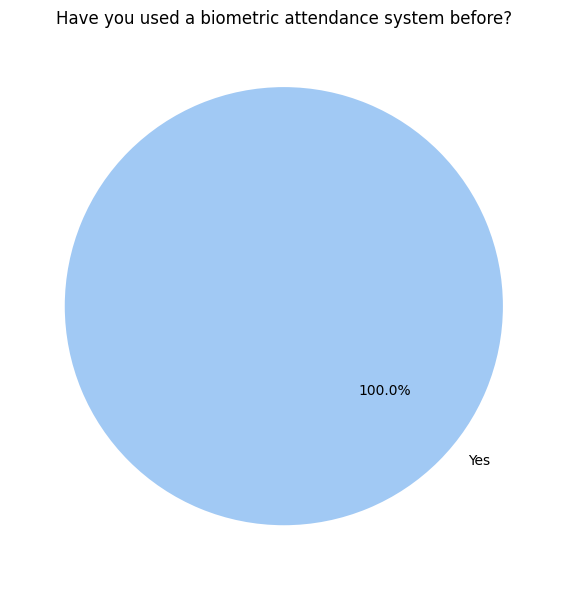

In [12]:
import pandas as pd

# Load CSV
df = pd.read_csv("408CA(Responses) - Form responses 1.csv")

# Strip whitespace from column names
df.columns = [col.strip() for col in df.columns]

# ======== Summary Info ========
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)

# ======== Plot 1: Effectiveness Rating ========


# ======== Plot 2: Usage of Biometric Attendance ========
plt.figure(figsize=(6, 6))
df['Have you used a biometric attendance system before?'].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Have you used a biometric attendance system before?")
plt.ylabel("")
plt.tight_layout()
plt.savefig("biometric_usage_pie.png")
plt.show()

# ======== Plot 3: Privacy Risk Perception ========



In [13]:
target = 'How effective do you think biometric attendance is compared to traditional methods (manual registers, ID card swipes, etc.)?'
X = df.drop(columns=[target])
y = df[target]

In [14]:
X_encoded = X.apply(LabelEncoder().fit_transform)

# Encode target
y = LabelEncoder().fit_transform(y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2)

In [16]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [17]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.42857142857142855
Classification Report:
               precision    recall  f1-score   support

           1       0.33      0.33      0.33         3
           2       0.50      0.50      0.50         4

    accuracy                           0.43         7
   macro avg       0.42      0.42      0.42         7
weighted avg       0.43      0.43      0.43         7



In [18]:
model.score(X_test,y_test)

0.42857142857142855

In [19]:
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [20]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),param_grid=param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train, y_train)

C:\Users\abhay\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy')

In [23]:
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [25]:
model2 = RandomForestClassifier(random_state=42,max_depth= None,min_samples_leaf= 1,min_samples_split= 2,n_estimators= 200)
model2.fit(X_train, y_train)

# Predict
y_pred = model2.predict(X_test)

In [27]:
model2.score(X_test,y_test)

0.5714285714285714